<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II - R4001

# TAREA SEMANAL 3

Autor: Nicolás Burgos


### ENUNCIADO

A partir de la siguiente plantilla y datos, se pide:

![alt text](plantilla_ts3.png)

1. Obtener la plantilla **normalizada** en frecuencia. Hallar $\epsilon$ ( factor de ripple ) y n ( orden) si se desea máxima planicidad en la banda de paso.

2. Obtener la transferencia **normalizada** utilizando los conceptos de partes de función. Recordar que: $|T(j\omega)|^2 = T(j\omega) \cdot T(-j\omega) = T(s) \cdot T(-s)|_{s = j\omega}$

3. Dibujar a mano: El diagrama de polos y ceros y  la respuesta de modulo y fase aproximada.

4. Simular la transferencia **normalizada** en Python. ¿ Es un filtro de Butterworth ?

5. Implementar la transferencia **normalizada** con el siguiente circuito basado en OTAs ideales. Hallar los valores de gm1, gm2, C1 ,C2, C3 y R1.

![alt text](circuito_otas_ts3.png)

### RESOLUCIÓN

#### PUNTO #1

Para obtener la plantilla normalizada, se utilizará coo norma de frecuencia a $f_p$ o bien $\omega_p$. De esta forma, se obtienen los siguientes valores, junto con la plantilla buscada:

\begin{equation}
\frac{f_p}{f_p} = 1
\end{equation}

\begin{equation}
\frac{f_s}{f_p} = 2
\end{equation}

\begin{equation}
\frac{\alpha_{MAX}}{f_p} = 0.67 \cdot 10^{-3} \frac{dB}{Hz}
\end{equation}

\begin{equation}
\frac{\alpha_{MIN}}{f_p} = 8 \cdot 10^{-3} \frac{dB}{Hz}
\end{equation}

![alt text](plantilla_normalizada_ts3.jpg)

Para obtener el valor de $\epsilon$ o Factor de Ripple, se realiza el siguiente cálculo:

\begin{equation}
\alpha_{MAX} = 10 \cdot log(1 + \epsilon^2)
\end{equation}

\begin{equation}
\epsilon = \sqrt{10^{\frac{\alpha_{MAX}}{10}} - 1} = 0.5089
\end{equation}

Luego, para calcular el orden n del filtro, se utiliza la siguiente expresión, donde $\omega_s = 2$, y se itera hasta conseguir un valor $\alpha_n \geq \alpha_{MIN}$:

\begin{equation}
\alpha_{MIN} = 10 \cdot log(1 + \epsilon^2 \cdot \omega_s^{2n})
\end{equation}

\begin{equation}
n = 1 \rightarrow \alpha_{n=1} = 3.088 dB \leq \alpha_{MIN}
\end{equation}

\begin{equation}
n = 2 \rightarrow \alpha_{n=2} = 7.113 dB \leq \alpha_{MIN}
\end{equation}

\begin{equation}
n = 3 \rightarrow \alpha_{n=3} = 12.449 dB > \alpha_{MIN}
\end{equation}

Entonces, el Factor de Ripple será $\epsilon = 0.5089$ y el orden del filtro será $n = 3$

#### PUNTO #2:

Para encontrar la expresión de la transferencia normalizada, se plantea lo siguiente:

\begin{equation}
|T(j\omega)|^2 = T(j\omega) \cdot T(-j\omega) = T(s) \cdot T(-s)|_{s = j\omega}
\end{equation}

\begin{equation}
|T(j\omega)|^2 = \frac{1}{1 + \epsilon^2 \cdot \omega^{2n}} = \frac{1}{Q(j\omega) \cdot Q(-j\omega)}
\end{equation}

\begin{equation}
|T(j\omega)|^2|_{\omega = \frac{s}{j}} = \frac{1}{1 + \epsilon^2 \cdot (\frac{s}{j})^6} = \frac{1}{Q(s) \cdot Q(s)^*} = \frac{1}{Q(s) \cdot Q(-s)}
\end{equation}

Ahora, se definen las expresiones de $Q(s)$ y $Q(-s)$:

\begin{equation}
Q(s) = s^3 + as^2 + bs + c
\end{equation}

\begin{equation}
Q(-s) = -s^3 + as^2 - bs + c
\end{equation}

Como paso siguiente, multiplicamos las dos expresiones anteriores:

\begin{equation}
Q(s) \cdot Q(-s) = -s^6 + s^4(a^2 + 2b) + s^2(2ac - b^2) + c^2
\end{equation}

Con la forma $Q(s) \cdot Q(-s)$, determinamos $T(s)$, $T(-s)$ y $T(s) \cdot T(-s)$:

\begin{equation}
T(s) = \frac{c}{s^3 + as^2 + bs + c}
\end{equation}

\begin{equation}
T(-s) = \frac{c}{-s^3 + as^2 - bs + c}
\end{equation}

\begin{equation}
T(s) \cdot T(-s) = \frac{c^2}{-s^6 + s^4(a^2 + 2b) + s^2(2ac - b^2) + c^2} = \frac{1}{1 - \epsilon^2 \cdot s^6}
\end{equation}

\begin{equation}
T(s) \cdot T(-s) = \frac{-c^2}{s^6 + s^4(2b - a^2) + s^2(b^2 - 2ac) - c^2} = \frac{-\frac{1}{\epsilon^2}}{s^6 - \frac{1}{\epsilon^2}}
\end{equation}

Al ser expresiones equivalentes, se obtienen las siguientes ecuaciones para determinar los valores de a, b y c:

\begin{equation}
c^2 = \frac{1}{\epsilon^2} \rightarrow c = \frac{1}{\epsilon}
\end{equation}

\begin{equation}
0 = b^2 - 2ac \rightarrow b = \sqrt{2ac} = \sqrt{\frac{2a}{\epsilon}} \rightarrow b = \frac{2}{\sqrt[3]{\epsilon^2}}
\end{equation}

\begin{equation}
0 = 2b - a^2 \rightarrow a = 2 \sqrt[3]{c} = \frac{2}{\sqrt[3]{\epsilon}}
\end{equation}

Con estos datos, podemos obtener todas las expresiones de la función transferencia normalizada:

\begin{equation}
T(s) = \frac{c}{s^3 + as^2 + bs + c} = \frac{\frac{1}{\epsilon}}{s^3 + \frac{2}{\sqrt[3]{\epsilon}} \cdot s^2 + \frac{2}{\sqrt[3]{\epsilon^2}} \cdot s + \frac{1}{\epsilon}} = \frac{1.965}{s^3 + 2.5051s^2 + 3.1377s + 1.965}
\end{equation}

\begin{equation}
T(j\omega) = \frac{\frac{1}{\epsilon}}{(\frac{1}{\epsilon}-\frac{2}{\sqrt[3]{\epsilon}}\omega^2) + j(\frac{2}{\sqrt[3]{\epsilon^2}}\omega - \omega^3)}
\end{equation}

\begin{equation}
|T(j\omega)| = \frac{\frac{1}{\epsilon}}{\sqrt{(\frac{1}{\epsilon}-\frac{2}{\sqrt[3]{\epsilon}}\omega^2)^2 + (\frac{2}{\sqrt[3]{\epsilon^2}}\omega - \omega^3)^2}}
\end{equation}

\begin{equation}
\theta[T(j\omega)] = - arctg \left( \frac{\frac{2}{\sqrt[3]{\epsilon^2}}\omega - \omega^3}{\frac{1}{\epsilon}-\frac{2}{\sqrt[3]{\epsilon}}\omega^2} \right)
\end{equation}

\begin{equation}
|T(j\omega)|^2 = \frac{\frac{1}{\epsilon^2}}{\omega^6 + \frac{1}{\epsilon^2}}
\end{equation}

#### PUNTO #3:

Para poder construir el diagrama de polos y ceros, es necesario encontrar las raíces del polinomio que se encuentra en el denominador de T(s):

\begin{equation}
T(s) = \frac{1.965}{s^3 + 2.5051s^2 + 3.1377s + 1.965} = \frac{1.965}{(s + 1.2525) \cdot (s + 0.6263 - j1.0847) \cdot (s + 0.6263 + j1.0847)}
\end{equation}

De donde se determinan los siguientes polos:

\begin{equation}
s_1 = -1.2525
\end{equation}

\begin{equation}
s_2 = -0.6263 + j1.0847
\end{equation}

\begin{equation}
s_3 = -0.6263 - j1.0847
\end{equation}

De esta manera, el diagrama de polos y ceros es el siguiente:

![alt text](diagram_polos_ceros_ts3.jpg)

Por otra parte, para determinar los espectros aproximados de módulo y fase de dicha transferencia, pueden utilizarse las expresiones vistas más arriba o bien realizar un análisis de Bode, como fue en este caso. Así, los resultados son los siguientes:

![alt text](espectro_amp_fase_ts3.jpg)

#### PUNTO #4:

Para simular la tranferencia normalizada en Python, se utilizó el siguiente código. Se adjuntan más abajo los resultados.

Como respuesta a la pregunta planteada, se puede decir que este filtro corresponde con uno del tipo Butterworth. Esto es posible de ver gracias a distintas características:

1. Se observa que en la banda de paso, la respuesta en magnitud o módulo es plana y sin ondulaciones.
2. Esta respuesta desciende suavemente desde 0 dB en la banda pasante.
3. En la frecuencia de corte, es posible observar una ganancia aproximada de -3 dB.
4. La caída fuera de la banda de paso es de -60 dB/década, lo que corresponde con la de un filtro de este tipo [-20n dB/década (n = orden del filtro)].
5. Los polos se encuentran distribuidos uniformemente sobre un semicírculo en el plano s, a la izquierda del eje $j\omega$.

<IPython.core.display.Math object>

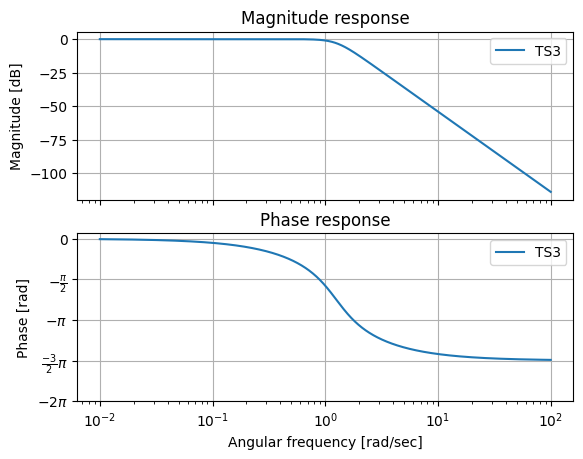

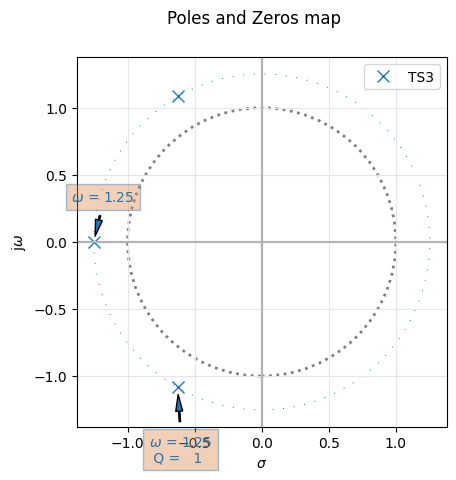

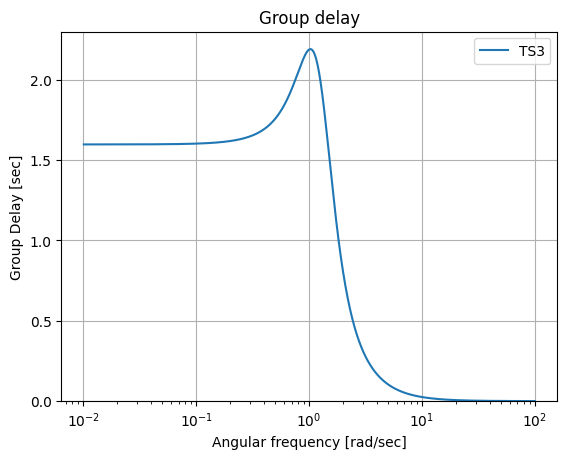

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti

a = 2.5051
b = 3.1377
c = 1.965

num = np.array(c) 
den = np.array([1, a, b, c])

pretty_print_lti(num,den)

H1 = sig.TransferFunction(num,den)

plt.show()
plt.close('all')
analyze_sys(H1, 'TS3')

#### PUNTO #5:

Para poder implementar la función transferencia trabajada a lo largo de este informe, se dispondrá el siguiente análisis de circuito propuesto:

![alt text](circuito_otas_ts3_analisis.png)

Así, se pueden establecer las siguientes ecuaciones en los nodos $V_o$, $V_x$ y $V_y$:

\begin{equation}
V_x \cdot sC_1 - (V_i - V_y) \cdot gm_1 = 0
\end{equation}

\begin{equation}
\frac{V_y}{R_1} - V_o(\frac{1}{R_1} + sC_3) = 0
\end{equation}

\begin{equation}
V_y \cdot sC_2 - (V_x - V_y) \cdot gm_2 = 0
\end{equation}

A partir de estas ecuaciones de nodos, podemos encontrar las expresiones de $V_x$ y $V_y$ en funcion de $V_o$:

\begin{equation}
V_y = V_o(1 + sC_3R_1)
\end{equation}

\begin{equation}
V_x = \frac{V_o}{gm_2} \cdot (s^2 C_2C_3R_1 + sC_3R_1gm_2 + sC_2 + gm_2)
\end{equation}

Por último, para obtener la expresión de la función transferencia, se reemplazan estas formas de $V_x$ y $V_y$ en la primera ecuación planteada y se opera algebráicamente:

\begin{equation}
sC_1 \cdot \frac{V_o}{gm_2} \cdot (s^2 C_2C_3R_1 + sC_3R_1gm_2 + sC_2 + gm_2) = V_i gm_1 - gm_1 \cdot V_o(1 + sC_3R_1)
\end{equation}

\begin{equation}
T(s) = \frac{V_o}{V_i} = \frac{\frac{gm_1gm_2}{C_1C_2C_3R_1}}{s^3 + s^2(\frac{gm_2}{C_2} + \frac{1}{C_3R_1}) + s(\frac{gm_2}{C_2C_3R_1} + \frac{gm_1gm_2}{C_1C_2}) + \frac{gm_1gm_2}{C_1C_2C_3R_1}}
\end{equation}

Para encontrar los valores de gm1, gm2, C1 ,C2, C3 y R1, se supondrá que $C_1 = C_2 = C_3 = 1 \mu F$. De esta forma, utilizando los valores de a, b y c encontrados en el Punto #2, se plantean las siguientes ecuaciones:

\begin{equation}
a = \frac{gm_2}{C_2} + \frac{1}{C_3R_1}
\end{equation}

\begin{equation}
b = \frac{gm_2}{C_2C_3R_1} + \frac{gm_1gm_2}{C_1C_2}
\end{equation}

\begin{equation}
c = \frac{gm_1gm_2}{C_1C_2C_3R_1}
\end{equation}

Operando algebráica y matemáticamente, se llega a los siguientes valores de gm1, gm2 y R1:

\begin{equation}
gm_1 = 1.2524846 \mu S
\end{equation}

\begin{equation}
gm_2 = 1.25257463 \mu S
\end{equation}

\begin{equation}
R_1 = 798.387 K\Omega
\end{equation}